# Spaceship Titanic

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

### Framing the problem

The object of this task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic'c collision with the spacetime anomaly.

This is a classic classification task, wchich requires supervised, offline learning.

The performance should be measured as a precision score.

75% precision score would be a satisfactory result

### Getting the data

In [2]:
train_kaggle = pd.read_csv(r'datasets\spaceship-titanic\train.csv')
test_kaggle = pd.read_csv(r'datasets\spaceship-titanic\test.csv')
train_set = pd.read_csv(r'datasets\spaceship-titanic\train.csv')
test_set = pd.read_csv(r'datasets\spaceship-titanic\test.csv')

### Exploring the data

In [3]:
train_kaggle.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


<AxesSubplot: >

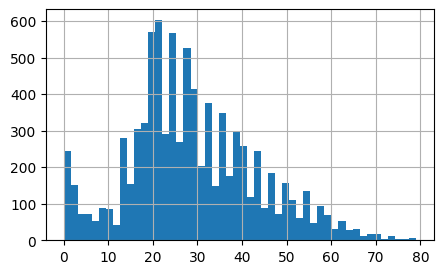

In [4]:
train_kaggle["Age"].hist(figsize=(5, 3), bins=50)

array([[<AxesSubplot: title={'center': 'RoomService'}>,
        <AxesSubplot: title={'center': 'FoodCourt'}>],
       [<AxesSubplot: title={'center': 'ShoppingMall'}>,
        <AxesSubplot: title={'center': 'Spa'}>],
       [<AxesSubplot: title={'center': 'VRDeck'}>, <AxesSubplot: >]],
      dtype=object)

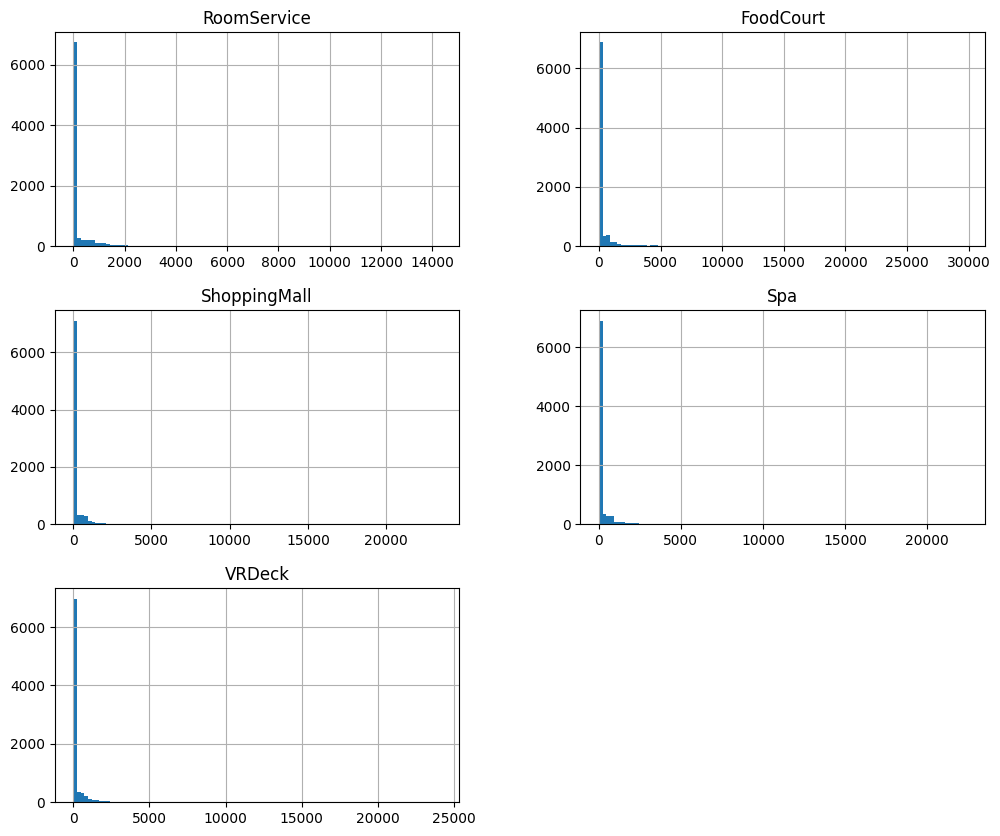

In [5]:
train_kaggle.drop(["Age"], axis=1).hist(figsize=(12, 10), bins=100)

Passenger ID may be interesting. It is constructed as gggg_pp where gggg is a group the passenger is travelling with and the pp is a passenger number within this group.

Maybe it would be heplful to extract the group number and add it to the table

In [6]:
train_kaggle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
train_kaggle.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [8]:
for category in train_kaggle.columns.values:
    missing_percent = train_kaggle[category].isnull().sum() / train_kaggle[category].size
    print(f"{category:15} {missing_percent:.2%}")

PassengerId     0.00%
HomePlanet      2.31%
CryoSleep       2.50%
Cabin           2.29%
Destination     2.09%
Age             2.06%
VIP             2.34%
RoomService     2.08%
FoodCourt       2.11%
ShoppingMall    2.39%
Spa             2.11%
VRDeck          2.16%
Name            2.30%
Transported     0.00%


In [9]:
train_kaggle['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [10]:
train_kaggle['CryoSleep'].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

Cabin seems to be irrelevant in the form it is now presented. Due to the fact that it is contructed as a deck/num/side, maybe I should transform it to 'deck', 'num' and 'side' columns.

In [11]:
train_kaggle['Destination'].value_counts() 

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

RoomService, FoodCourt, ShoppingMall, Spa, VRDeck are the amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

I'm not sure now if it this information has any meaning in this task

In [12]:
train_kaggle['Cabin'].str.split('/', 2, expand=True)

C:\Users\m.olszanski\AppData\Local\Temp\ipykernel_3108\1169071137.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  train_kaggle['Cabin'].str.split('/', 2, expand=True)


,0,1,2
0,B,0,P
1,F,0,S
2,A,0,S
3,A,0,S
4,F,1,S
...,...,...,...
8688,A,98,P
8689,G,1499,S
8690,G,1500,S
8691,E,608,S


In [13]:
train_kaggle['Cabin'].str.split('/', 2, expand=True)[0].value_counts()

C:\Users\m.olszanski\AppData\Local\Temp\ipykernel_3108\3200373939.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  train_kaggle['Cabin'].str.split('/', 2, expand=True)[0].value_counts()


F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: 0, dtype: int64

In [14]:
from sklearn.base import BaseEstimator, TransformerMixin
import copy

class SeatInfoAdder(BaseEstimator, TransformerMixin):
    '''Class to add a passenger Group info, as well as his Deck, Num and Side'''

    def __init__(self, only_deck=True):
        self.only_deck = only_deck
    
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X_new = copy.deepcopy(X)
                
        X_new["deck"] =  X_new['Cabin'].str.split('/', n=2, expand=True)[0]
        
        if self.only_deck:
            return X_new
        else:
            X_new["num"], X_new["side"] = X_new['Cabin'].str.split('/', n=2, expand=True)[1:]
            return X_new
    
class ColumnDropper(BaseEstimator, TransformerMixin):
    """Class to drop unnecessary Columns"""
    
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        
        return X.drop(["Cabin", "Name"], axis=1)

attr_adder = SeatInfoAdder()
train = attr_adder.transform(train_kaggle)
col_drop = ColumnDropper()
train = col_drop.transform(train)
train = train.dropna(axis=0)

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6764 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   6764 non-null   object 
 1   HomePlanet    6764 non-null   object 
 2   CryoSleep     6764 non-null   object 
 3   Destination   6764 non-null   object 
 4   Age           6764 non-null   float64
 5   VIP           6764 non-null   object 
 6   RoomService   6764 non-null   float64
 7   FoodCourt     6764 non-null   float64
 8   ShoppingMall  6764 non-null   float64
 9   Spa           6764 non-null   float64
 10  VRDeck        6764 non-null   float64
 11  Transported   6764 non-null   bool   
 12  deck          6764 non-null   object 
dtypes: bool(1), float64(6), object(6)
memory usage: 693.6+ KB


In [16]:
train.head(3)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A


In [17]:
corr = train.corr()
corr['Transported'].sort_values(ascending=False)

C:\Users\m.olszanski\AppData\Local\Temp\ipykernel_3108\4045656778.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()


Transported     1.000000
FoodCourt       0.053850
ShoppingMall    0.014998
Age            -0.080535
VRDeck         -0.207761
Spa            -0.220134
RoomService    -0.247801
Name: Transported, dtype: float64

In [18]:

from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

cat_attribs = ["HomePlanet", "CryoSleep", "Destination", "VIP", "Cabin", "Name"]
num_attribs = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "VRDeck", "Spa"]


cat_pipe = Pipeline([
    ("attr_add", SeatInfoAdder()),
    ("col_drop", ColumnDropper()),
    ("one_hot_enc", OneHotEncoder()),
])

num_pipe = Pipeline([
    ("imp", SimpleImputer(strategy="median")),
    ("std_scaler", StandardScaler()),
])

full_pipe = ColumnTransformer([
    ("num", num_pipe, num_attribs),
    ("cat", cat_pipe, cat_attribs),
])

In [23]:
X = train_set.drop(columns=["Transported"], axis=0)
y = train_set["Transported"].copy()
X_new = full_pipe.fit_transform(X)

lasso = Lasso(alpha=0.1)

lasso_reg = lasso.fit(X_new, y)

In [25]:
from sklearn.linear_model import SGDClassifier
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV


some_data = X.iloc[:5]
some_labels = y.iloc[:5]

sgd_clf = SGDClassifier()
sgd_clf.fit(X_new, y)

some_data_prepared = full_pipe.transform(some_data)
print("Predicitons: ", sgd_clf.predict(some_data_prepared))
print("Labels: ", list(some_labels))

rand_params = {
    'loss': ['hinge', 'log_loss', 'modified_huber'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': reciprocal(0.0001, 0.001),
}

sgd_rand = RandomizedSearchCV(sgd_clf, rand_params, n_iter=100,
                              scoring='accuracy', cv=5, return_train_score=True)

sgd_rand.fit(X_new, y)

Predicitons:  [ True False False False False]
Labels:  [False, True, False, False, True]


RandomizedSearchCV(cv=5, estimator=SGDClassifier(), n_iter=100,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000018D6539A6D0>,
                                        'loss': ['hinge', 'log_loss',
                                                 'modified_huber'],
                                        'penalty': ['l2', 'l1', 'elasticnet']},
                   return_train_score=True, scoring='accuracy')

In [26]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import precision_recall_curve

y_predictions = sgd_clf.predict(X_new)

print(confusion_matrix(y, y_predictions))
print(precision_score(y, y_predictions))
print(recall_score(y, y_predictions))

[[3325  990]
 [ 802 3576]]
0.783180026281209
0.8168113293741435


In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

params = {
    "n_estimators": [250, 500, 1000],
    "max_leaf_nodes": [80, 120, 200]
}

forest_clf = RandomForestClassifier()
grid_CV2 = GridSearchCV(forest_clf, params, cv=2, verbose=3, scoring="f1")
grid_CV2.fit(X_new, y)

best_forest = grid_CV2.best_estimator_
print(best_forest)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV 1/2] END max_leaf_nodes=80, n_estimators=250;, score=0.791 total time=   0.7s
[CV 2/2] END max_leaf_nodes=80, n_estimators=250;, score=0.797 total time=   0.6s
[CV 1/2] END max_leaf_nodes=80, n_estimators=500;, score=0.789 total time=   1.3s
[CV 2/2] END max_leaf_nodes=80, n_estimators=500;, score=0.793 total time=   1.4s
[CV 1/2] END max_leaf_nodes=80, n_estimators=1000;, score=0.791 total time=   2.4s
[CV 2/2] END max_leaf_nodes=80, n_estimators=1000;, score=0.795 total time=   2.3s
[CV 1/2] END max_leaf_nodes=120, n_estimators=250;, score=0.790 total time=   0.5s
[CV 2/2] END max_leaf_nodes=120, n_estimators=250;, score=0.799 total time=   0.6s
[CV 1/2] END max_leaf_nodes=120, n_estimators=500;, score=0.790 total time=   1.3s
[CV 2/2] END max_leaf_nodes=120, n_estimators=500;, score=0.797 total time=   1.2s
[CV 1/2] END max_leaf_nodes=120, n_estimators=1000;, score=0.790 total time=   2.6s
[CV 2/2] END max_leaf_nodes=12

In [38]:
y_predictions = best_forest.predict(X_new)

print(confusion_matrix(y, y_predictions))
print(precision_score(y, y_predictions))
print(recall_score(y, y_predictions))

[[3560  755]
 [ 587 3791]]
0.833919929608447
0.8659205116491548


In [39]:
clf = grid_CV2.best_estimator_

X = test_kaggle
X_prep = full_pipe.transform(X)

y_pred = clf.predict(X_prep)

predictions = np.c_[np.asarray(X["PassengerId"]), y_pred]

In [40]:
import csv

filename = r'datasets\spaceship-titanic\predictions.csv.'

with open(filename, 'w', newline='') as f:
    writer = csv.writer(f, delimiter=',')
    writer.writerow(['PassengerID', 'Transported'])
    writer.writerows(predictions)